<a href="https://colab.research.google.com/github/luyuzhe111/machine-learning-foundamentals/blob/main/nonlinear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression

### Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
with open('hw2_p3.pkl', 'rb') as f:
    data = pickle.load(f)

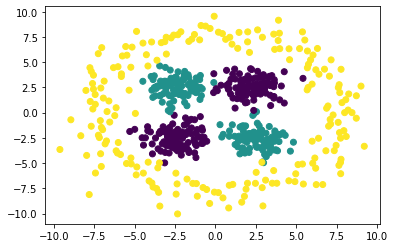

In [3]:
plt.scatter(data['x_train'][:, 0], data['x_train'][:, 1], c=data['y_train'])
plt.show()

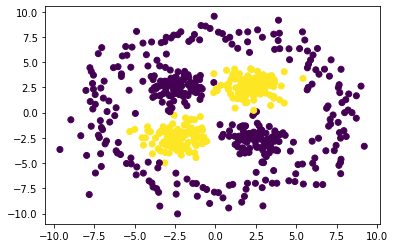

In [4]:
# label 0 vs label other
y_train_0 = data['y_train']
y_train_0 = np.where(y_train_0 != 0, 0, 1)
plt.scatter(data['x_train'][:, 0], data['x_train'][:, 1], c=y_train_0)
plt.show()

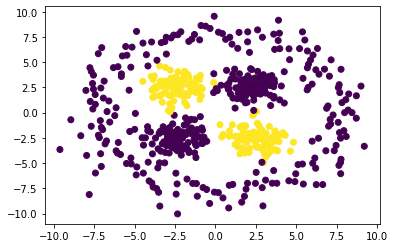

In [5]:
# label 1 vs label other
y_train_1 = data['y_train']
y_train_1 = np.where(y_train_1 != 1, 0, 1)
plt.scatter(data['x_train'][:, 0], data['x_train'][:, 1], c=y_train_1)
plt.show()

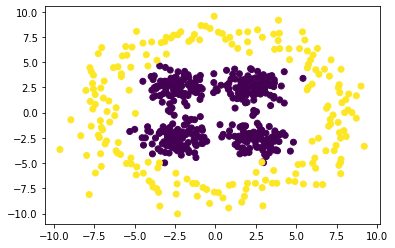

In [6]:
# label 2 vs label other
y_train_2 = data['y_train']
y_train_2 = np.where(y_train_2 != 2, 0, 1)
plt.scatter(data['x_train'][:, 0], data['x_train'][:, 1], c=y_train_2)
plt.show()

I will use a polynomial basis with degree 2 to solve this logistic regression problem

### Problem 2
In this problem we will classify label zero vs. the rest.

In [7]:
def degree2_poly_basis(x):
  x1 = x[:, 0]
  x2 = x[:, 1]
  return np.stack([np.ones(x.shape[0]), x1, x2, x1 ** 2, x2**2, x1 * x2], axis=-1)

In [8]:
def sigmoid(output):
  return 1 / (1 + np.exp(-output))

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
y_train_0 = data['y_train']
y_train_0 = np.where(y_train_0 != 0, 0, 1)
y_train_0 = y_train_0[:, np.newaxis]

y_test_0 = data['y_test']
y_test_0 = np.where(y_test_0 != 0, 0, 1)
y_test_0 = y_test_0[:, np.newaxis]

x = data['x_train']
X = degree2_poly_basis(x)

x_test = data['x_test']
X_test = degree2_poly_basis(x_test)
np.random.seed(3)
w = np.random.rand(6, 1)

interval = 100
for i in range(1000):
  ep = 1e-9
  p = sigmoid(X @ w)
  p_test = sigmoid(X_test @ w)
  loss = - y_train_0 * np.log(p + ep) - (1 - y_train_0) * np.log(1 - p + ep)
  grad = X.T @ (p - y_train_0)

  w -= 1e-5 * grad
  
  pred = np.where(p > 0.5, 1, 0)
  pred_test = np.where(p_test > 0.5, 1, 0)

  if (i + 1) % interval == 0:
    print(f'epoch {i + 1}: loss: {loss.mean()}')
    print(f'train acc: {accuracy_score(y_train_0, pred)}, test acc: {accuracy_score(y_test_0, pred_test)}')

epoch 100: loss: 0.41562672464943917
train acc: 0.7833333333333333, test acc: 0.7933333333333333
epoch 200: loss: 0.307616415896847
train acc: 0.8633333333333333, test acc: 0.9
epoch 300: loss: 0.281019031379044
train acc: 0.8833333333333333, test acc: 0.9066666666666666
epoch 400: loss: 0.2696384631175382
train acc: 0.8916666666666667, test acc: 0.9066666666666666
epoch 500: loss: 0.26154055956679023
train acc: 0.9033333333333333, test acc: 0.9266666666666666
epoch 600: loss: 0.25494780812855455
train acc: 0.9116666666666666, test acc: 0.9266666666666666
epoch 700: loss: 0.2493605882101185
train acc: 0.9133333333333333, test acc: 0.9333333333333333
epoch 800: loss: 0.24449438563051393
train acc: 0.9166666666666666, test acc: 0.9333333333333333
epoch 900: loss: 0.24015853687066274
train acc: 0.92, test acc: 0.9333333333333333
epoch 1000: loss: 0.23622557548599207
train acc: 0.9283333333333333, test acc: 0.9333333333333333


### Problem 3

We can extend binary classifier for multi-class classification using one vs all strategy.

In [11]:
def binary_classifier(pos_label, verbose=False):
  y_train = data['y_train']
  y_train = np.where(y_train != pos_label, 0, 1)
  y_train = y_train[:, np.newaxis]

  y_test = data['y_test']
  y_test = np.where(y_test != pos_label, 0, 1)
  y_test = y_test[:, np.newaxis]

  x = data['x_train']
  X = degree2_poly_basis(x)

  x_test = data['x_test']
  X_test = degree2_poly_basis(x_test)
  np.random.seed(0)
  w = np.random.rand(6, 1)

  interval = 100
  for i in range(1200):
    ep = 1e-9
    p = sigmoid(X @ w)
    p_test = sigmoid(X_test @ w)
    loss = - y_train * np.log(p + ep) - (1 - y_train) * np.log(1 - p + ep)
    grad = X.T @ (p - y_train)

    w -= 1e-5 * grad
    
    pred = np.where(p > 0.5, 1, 0)
    pred_test = np.where(p_test > 0.5, 1, 0)

    if verbose and (i + 1) % interval == 0:
      print(f'epoch {i + 1}: loss: {loss.mean()}')
      print(f'train acc: {accuracy_score(y_train, pred)}, test acc: {accuracy_score(y_test, pred_test)}')
  
  p_test = sigmoid(X_test @ w)
  return p_test

In [12]:
label_zero_preds = binary_classifier(0)
label_one_preds = binary_classifier(1)
label_two_preds = binary_classifier(2)

In [13]:
final_preds = np.argmax(np.stack((label_zero_preds, label_one_preds, label_two_preds), axis=-1), axis=-1)

In [14]:
print(f"The accuracy on test is {accuracy_score(final_preds, data['y_test']) * 100}%")

The accuracy on test is 95.33333333333334%


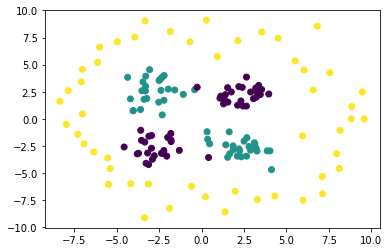

In [15]:
plt.scatter(data['x_test'][:, 0], data['x_test'][:, 1], c=data['y_test'])
plt.show()

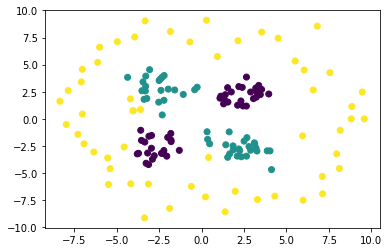

In [16]:
plt.scatter(data['x_test'][:, 0], data['x_test'][:, 1], c=final_preds)
plt.show()

## Kernel Support Vector Machines

### Problem 1

I will just use a degree 2 polynomial kernel as it seems to work really well in the example above. 

### Problem 2

In [17]:
from cvxopt import matrix, solvers

In [18]:
def poly_kernel(x, z, degree=2):
  return np.power(x @ z.T, degree)

In [19]:
def binary_svm_classifier(pos_label):
  y_train = data['y_train']
  y_train = np.where(y_train != pos_label, -1, 1)
  y_train = y_train[:, np.newaxis]

  x = data['x_train']
  K = poly_kernel(x, x)
  C = 0.1
  m = x.shape[0]
  P = matrix(y_train @ y_train.T * K)
  q = matrix(np.ones((m, 1)) * -1)
  A = matrix(y_train.reshape(1, -1).astype('float'))
  b = matrix(np.zeros(1))          
  G = matrix(np.concatenate((np.eye(m) * -1, np.eye(m)), axis=0))        
  h = matrix(np.concatenate((np.zeros(m), np.ones(m) * C), axis=-1))

  solution = solvers.qp(P, q, G, h, A, b)
  alphas = np.array(solution['x'])

  threshold = 1e-4
  ind = (alphas > threshold).flatten()
  sv = x[ind]
  sv_y = y_train[ind]
  alphas = alphas[ind]

  b = sv_y - np.sum(poly_kernel(sv, sv) * alphas * sv_y, axis=0)
  b = np.sum(b) / b.size

  x_test = data['x_test']
  prod = np.sum(poly_kernel(sv, x_test) * alphas * sv_y, axis=0) + b

  return prod

In [20]:
pred = np.sign(binary_svm_classifier(0))

     pcost       dcost       gap    pres   dres
 0: -2.0509e+02 -1.2614e+02  4e+03  2e+01  2e-11
 1: -4.0504e+01 -1.1916e+02  3e+02  2e+00  1e-11
 2: -2.7855e+01 -8.3756e+01  1e+02  5e-01  4e-12
 3: -2.0950e+01 -4.9040e+01  6e+01  2e-01  2e-12
 4: -1.6195e+01 -2.6840e+01  3e+01  1e-01  1e-12
 5: -1.3457e+01 -1.9470e+01  2e+01  7e-02  1e-12
 6: -1.1899e+01 -1.6083e+01  1e+01  5e-02  1e-12
 7: -1.1081e+01 -1.4236e+01  1e+01  3e-02  8e-13
 8: -9.8557e+00 -1.2562e+01  9e+00  2e-02  7e-13
 9: -9.2411e+00 -1.1361e+01  7e+00  2e-02  8e-13
10: -8.7829e+00 -1.0547e+01  5e+00  1e-02  7e-13
11: -8.3159e+00 -9.7030e+00  4e+00  7e-03  6e-13
12: -8.0074e+00 -9.1932e+00  3e+00  4e-03  6e-13
13: -7.9012e+00 -8.3156e+00  8e-01  1e-03  7e-13
14: -7.8408e+00 -8.0244e+00  3e-01  3e-04  6e-13
15: -7.8694e+00 -7.8901e+00  3e-02  2e-05  7e-13
16: -7.8763e+00 -7.8767e+00  5e-04  3e-07  7e-13
17: -7.8764e+00 -7.8764e+00  5e-06  3e-09  8e-13
Optimal solution found.


In [21]:
preds = np.ones(x_test.shape[0])
preds[pred > 0] = 0

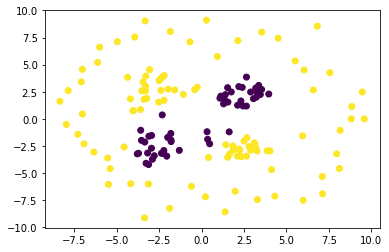

In [22]:
plt.scatter(data['x_test'][:, 0], data['x_test'][:, 1], c=preds)
plt.show()

In [23]:
y_test = data['y_test']
y_test = np.where(y_test != 0, 1, 0)
y_test = y_test[:, np.newaxis]
print(f'acc of classifying label 0: {round(accuracy_score(preds, y_test) * 100, 2)}')

acc of classifying label 0: 94.67


### Problem 3

In [24]:
pred_0 = binary_svm_classifier(0)
pred_1 = binary_svm_classifier(1)
pred_2 = binary_svm_classifier(2)

     pcost       dcost       gap    pres   dres
 0: -2.0509e+02 -1.2614e+02  4e+03  2e+01  2e-11
 1: -4.0504e+01 -1.1916e+02  3e+02  2e+00  1e-11
 2: -2.7855e+01 -8.3756e+01  1e+02  5e-01  4e-12
 3: -2.0950e+01 -4.9040e+01  6e+01  2e-01  2e-12
 4: -1.6195e+01 -2.6840e+01  3e+01  1e-01  1e-12
 5: -1.3457e+01 -1.9470e+01  2e+01  7e-02  1e-12
 6: -1.1899e+01 -1.6083e+01  1e+01  5e-02  1e-12
 7: -1.1081e+01 -1.4236e+01  1e+01  3e-02  8e-13
 8: -9.8557e+00 -1.2562e+01  9e+00  2e-02  7e-13
 9: -9.2411e+00 -1.1361e+01  7e+00  2e-02  8e-13
10: -8.7829e+00 -1.0547e+01  5e+00  1e-02  7e-13
11: -8.3159e+00 -9.7030e+00  4e+00  7e-03  6e-13
12: -8.0074e+00 -9.1932e+00  3e+00  4e-03  6e-13
13: -7.9012e+00 -8.3156e+00  8e-01  1e-03  7e-13
14: -7.8408e+00 -8.0244e+00  3e-01  3e-04  6e-13
15: -7.8694e+00 -7.8901e+00  3e-02  2e-05  7e-13
16: -7.8763e+00 -7.8767e+00  5e-04  3e-07  7e-13
17: -7.8764e+00 -7.8764e+00  5e-06  3e-09  8e-13
Optimal solution found.
     pcost       dcost       gap    pres   dre

In [25]:
final_preds = np.argmax(np.stack((pred_0, pred_1, pred_2), axis=-1), axis=-1)

### Problem 4

In [26]:
print(f"The accuracy on test is {accuracy_score(final_preds, data['y_test']) * 100}%")

The accuracy on test is 98.0%


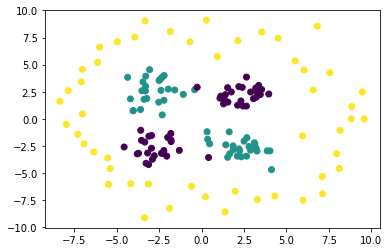

In [27]:
plt.scatter(data['x_test'][:, 0], data['x_test'][:, 1], c=data['y_test'])
plt.show()

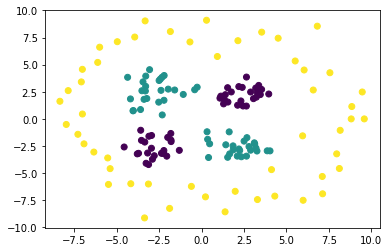

In [28]:
plt.scatter(data['x_test'][:, 0], data['x_test'][:, 1], c=final_preds)
plt.show()